## ExMAS
> Exact Matching of Attractive Shared rides (ExMAS) for system-wide strategic evaluations
> 
> Kucharski R., Cats O. ,_Transportation Research Part: B_, 2020

---
#### Walkthrough

In [11]:
%load_ext autoreload
%autoreload 2
import os
cwd = os.getcwd()

In [2]:
os.chdir(os.path.join(cwd,'../../..'))
import ExMAS.main
import ExMAS.utils

In [3]:
from ExMAS.utils import inData as inData

### prepare

1. __load the default config__ (see more details in `ExMAS/notebooks/01 configuration.ipynb`)

In [22]:
params = ExMAS.utils.get_config('ExMAS/data/configs/potential.json') # load the default 
params.paths.G = 'ExMAS/data/graphs/AmsterdamPotential.graphml'
params.paths.skim = 'ExMAS/data/graphs/AmsterdamPotential.csv'
params.t0 = '15:00'
ExMAS.utils.save_config(params, 'ExMAS/data/configs/potential.json') # load the default 

In [30]:
import osmnx as ox
import networkx as nx
import pandas as pd

In [28]:
inData.G = ox.load_graphml(filepath=params.paths.G)
inData.nodes = pd.DataFrame.from_dict(dict(inData.G.nodes(data=True)), orient='index')

In [31]:
inData.skim_generator = nx.all_pairs_dijkstra_path_length(inData.G,
                                                                  weight='length')
inData.skim_dict = dict(inData.skim_generator)  # filled dict is more usable

In [32]:
inData.skim = pd.DataFrame(inData.skim_dict).fillna(params.dist_threshold).T.astype(
    int)  # and dataframe is more intuitive

2. __load the network__ (see more details in `ExMAS/notebooks/02 NetworkGraphs.ipynb`)

In [33]:
inData.skim.to_csv(params.paths.skim, chunksize=20000000)

In [34]:
inData = ExMAS.utils.load_G(inData, params, stats=True)  # download the graph

3. __generate trip requests__ (see more details in `ExMAS/notebooks/03 Demand Generation.ipynb`)

In [35]:
inData.requests = ExMAS.utils.load_requests('/Users/rkucharski/Documents/GitHub/ExMAS/ExMAS/spinoffs/potential/requests/requests_nCenters_1_gammdist_shape_1.5_gamma_imp_shape_1.15.csv')

In [13]:
inData.requests

,origin,destination,treq,tdep,ttrav,tarr,tdrop,dist,pax_id
1,46324931,46330820,2020-10-06 16:30:03,NaN,01:33:01,2020-10-06 18:03:04,NaN,5581,1
2,46316302,2020569050,2020-10-06 16:30:04,NaN,00:48:53,2020-10-06 17:18:57,NaN,2933,2
3,46314472,46324030,2020-10-06 16:30:06,NaN,00:08:01,2020-10-06 16:38:07,NaN,481,3
4,2337049929,46400968,2020-10-06 16:30:15,NaN,00:33:01,2020-10-06 17:03:16,NaN,1981,4
5,46381769,2296494806,2020-10-06 16:30:21,NaN,00:26:07,2020-10-06 16:56:28,NaN,1567,5
...,...,...,...,...,...,...,...,...,...
996,46324430,46526765,2020-10-06 17:29:16,NaN,02:47:18,2020-10-06 20:16:34,NaN,10038,996
997,46563125,46541708,2020-10-06 17:29:18,NaN,00:31:42,2020-10-06 18:01:00,NaN,1902,997
998,46475285,1527925315,2020-10-06 17:29:19,NaN,00:49:26,2020-10-06 18:18:45,NaN,2966,998
999,1746135649,46301182,2020-10-06 17:29:27,NaN,01:54:10,2020-10-06 19:23:37,NaN,6850,999


### run

14-10-20 16:03:02-INFO-Initializing pairwise trip shareability between 200 and 200 trips.
14-10-20 16:03:02-INFO-creating combinations
14-10-20 16:03:03-INFO-999000	 nR*(nR-1)
14-10-20 16:03:04-INFO-338500	departure compatibility
[2054127618, 46399501, 46305298, 752672787, 46481428, 3694043159, 46342168, 46411806, 2054127647, 46534687, 2020569119, 46338081, 4966813734, 46338087, 721231915, 5385801772, 2020569132, 46358578, 2020569141, 46362680, 46456890, 46313531, 46309441, 46301250, 1150816323, 46280776, 3315109961, 46387274, 46346316, 2020569166, 46448723, 7191482452, 46276693, 297095257, 297095258, 4849406042, 297095259, 46276705, 7223513187, 46288996, 46440551, 1150816359, 297095272, 297095273, 46317676, 2020569196, 46321773, 46276719, 297095279, 46309493, 46215285, 2020569209, 46219388, 46366845, 46489731, 46379144, 46280842, 46456971, 46268557, 46395538, 898240661, 46346389, 46444704, 46354595, 46260390, 46497965, 46395565, 46346415, 7230046384, 46383282, 46268594, 46391478, 4641

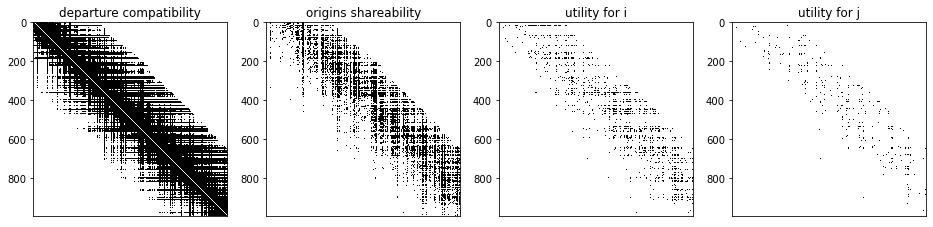

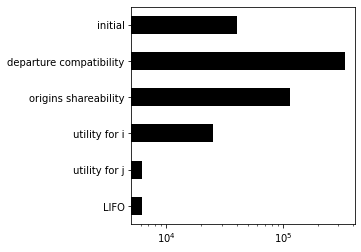

14-10-20 16:03:44-INFO-Degree 2 	Completed
14-10-20 16:03:44-INFO-trips to extend at degree 2 : 12307
14-10-20 16:04:31-INFO-At degree 2 feasible extensions found out of 8207 searched
14-10-20 16:04:31-INFO-Degree 3 	Completed
14-10-20 16:04:31-INFO-trips to extend at degree 3 : 8207
14-10-20 16:05:05-INFO-At degree 3 feasible extensions found out of 2847 searched
14-10-20 16:05:05-INFO-Degree 4 	Completed
14-10-20 16:05:05-INFO-trips to extend at degree 4 : 2847
14-10-20 16:05:13-INFO-At degree 4 feasible extensions found out of 222 searched
14-10-20 16:05:13-INFO-Degree 5 	Completed
14-10-20 16:05:13-INFO-trips to extend at degree 5 : 222
14-10-20 16:05:13-INFO-At degree 5 feasible extensions found out of 2 searched
14-10-20 16:05:13-INFO-Degree 6 	Completed
14-10-20 16:05:13-INFO-trips to extend at degree 6 : 2
14-10-20 16:05:13-INFO-At degree 6 feasible extensions found out of 0 searched
14-10-20 16:05:13-INFO-Degree 7 	Completed
14-10-20 16:05:13-INFO-No more trips to exted at deg

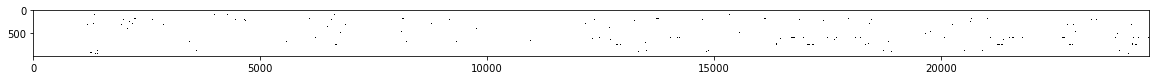

14-10-20 16:06:10-INFO-Problem solution: Optimal. 
Total costs for single trips:        470,147 
reduced by matching to:              328,854
14-10-20 16:06:10-INFO-Calculations  completed
14-10-20 16:06:11-INFO-DotMap(VehHourTrav=326934, VehHourTrav_ns=470147, PassHourTrav=546671, PassHourTrav_ns=470147, PassUtility=6944.207699999999, PassUtility_ns=7292.4505, mean_lambda=0.3636323862466543, revenue_s=493654.35, revenue_ns=705220.5, Fare_Discount=-0.30000000000000004, nR=1000, SINGLE=407, PAIRS=128, TRIPLES=59, QUADRIPLES=30, QUINTETS=8, PLUS5=0, shared_ratio=0.593, fleet_size_nonshared=156.0, fleet_size_shared=110.0, lambda_shared=0.3636323862466543)


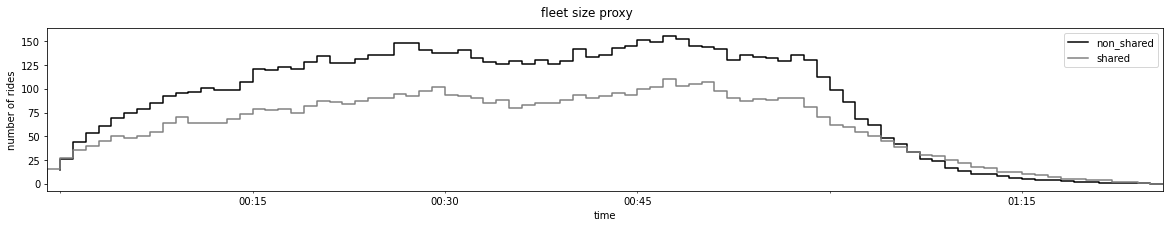

In [36]:
inData = ExMAS.main(inData, params, plot = True)

### results:
> illustrative example of 100 rides

KPIs

In [37]:
KPIs = inData.sblts.res.to_frame()
KPIs['description']  = ExMAS.utils.KPIs_descriptions
KPIs.columns = ['KPI', 'description']
KPIs

,KPI,description
VehHourTrav,326934,total travel time of vehicles (with travellers...
VehHourTrav_ns,470147,as above yet in non-shared scenarion
PassHourTrav,546671,total travel time of passengers
PassHourTrav_ns,470147,as above yet in non-shared scenarion
PassUtility,6944.21,total (dis)utility of passengers
PassUtility_ns,7292.45,as above yet in non-shared scenarion
mean_lambda,0.363632,mean vehicle cost reduction (lambda) over shar...
revenue_s,493654,total fares paid by travellers sharing
revenue_ns,705220,as above yet in non-shared scenarion
Fare_Discount,-0.3,relative revenue reduction


 all feasible rides

In [38]:
inData.sblts.requests

,index,origin,destination,treq,tdep,ttrav,tarr,tdrop,dist,pax_id,VoT,delta,u,u_PT,ride_id,ttrav_sh,u_sh,kind,position
0,1,46324931,46330820,0,NaN,697,2020-10-06 18:03:04,NaN,5581,1,0.0035,391.120879,10.8110,999999,16340,999,10.808175,30,0
1,2,46316302,2020569050,1,NaN,366,2020-10-06 17:18:57,NaN,2933,2,0.0035,205.615385,5.6805,999999,6046,402,5.331900,20,0
2,3,46314472,46324030,3,NaN,60,2020-10-06 16:38:07,NaN,481,3,0.0035,33.725275,0.9315,999999,2,60,0.931500,1,0
3,4,2337049929,46400968,12,NaN,247,2020-10-06 17:03:16,NaN,1981,4,0.0035,138.923077,3.8360,999999,3106,247,3.538325,20,1
4,5,46381769,2296494806,18,NaN,195,2020-10-06 16:56:28,NaN,1567,5,0.0035,109.978022,3.0330,999999,3106,214,2.885225,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,46324430,46526765,3553,NaN,1254,2020-10-06 20:16:34,NaN,10038,996,0.0035,703.384615,19.4460,999999,21475,1464,17.788050,30,2
996,997,46563125,46541708,3555,NaN,237,2020-10-06 18:01:00,NaN,1902,997,0.0035,133.417582,3.6825,999999,5298,252,3.205125,20,0
997,998,46475285,1527925315,3556,NaN,370,2020-10-06 18:18:45,NaN,2966,998,0.0035,207.956044,5.7440,999999,997,370,5.744000,1,0
998,999,1746135649,46301182,3564,NaN,856,2020-10-06 19:23:37,NaN,6850,999,0.0035,479.934066,13.2710,999999,7693,1123,13.225800,21,0


selected rides in the solution

In [10]:
inData.sblts.schedule.sample(5)

,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index,lambda_r,PassHourTrav_ns,row,selected
456,"[156, 175]",9.8294,625,20,"[5.898899999999999, 3.9304999999999994]","[2798.0, 337, 130, 143]","[156, 175]","[156, 175]",2,456,0.087591,685,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
768,"[16, 13]",12.5335,716,21,"[7.7812, 4.7523]","[212.0, 85, 351, 265]","[16, 13]","[13, 16]",2,768,0.172254,865,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
47,[47],3.6485,235,1,[3.6485000000000003],"[865, 235]",[47],[47],1,47,0.300000,235,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
484,"[18, 21]",5.9535,402,20,"[2.6643749999999997, 3.2891249999999994]","[261.5, 147, 72, 168]","[18, 21]","[18, 21]",2,484,0.026634,413,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
55,[55],3.9725,256,1,[3.9724999999999997],"[971, 256]",[55],[55],1,55,0.300000,256,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1


trips with parameters of the shared ride

In [11]:
inData.sblts.requests.sample(5)

,index,origin,destination,treq,tdep,ttrav,tarr,tdrop,dist,pax_id,VoT,delta,u,u_PT,ride_id,ttrav_sh,u_sh,kind,position
29,10,44833576,4217813217,517,NaN,102,2020-07-03 14:52:27,NaN,822,10,0.0035,57.758242,1.5900,999999,29,102,1.590000,1,0
187,141,385474972,44773463,3333,NaN,274,2020-07-03 16:02:14,NaN,2193,141,0.0035,153.659341,4.2485,999999,187,274,4.248500,1,0
28,57,1552650568,1518087729,508,NaN,398,2020-07-03 15:31:43,NaN,3187,57,0.0035,223.351648,6.1735,999999,28,398,6.173500,1,0
75,148,44725075,3669218090,1241,NaN,648,2020-07-03 16:17:13,NaN,5184,148,0.0035,363.164835,10.0440,999999,532,755,8.971725,20,1
56,183,44797365,4301397897,984,NaN,543,2020-07-03 15:58:56,NaN,4344,183,0.0035,304.318681,8.4165,999999,555,593,7.989625,20,1


---
(c) Rafał Kucharski, Delft, 2020